In [1]:
import pandas as pd

df = pd.read_csv('./datasets/valentine_dataset.csv')
df

,Name,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,Leon Cruz,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,Samuel Brown,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,Lori Baker,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,Tina Fitzgerald,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,Jason Simmons,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...,...
19995,Michael Vega,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,Debra Horn,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,Aaron Burgess,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,Rebecca Morton,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                20000 non-null  object 
 1   Age                 20000 non-null  int64  
 2   Gender              20000 non-null  object 
 3   Income              20000 non-null  int64  
 4   Appearance_Score    20000 non-null  float64
 5   Interests_Score     20000 non-null  float64
 6   Confidence_Score    20000 non-null  float64
 7   Educational_Status  20000 non-null  object 
 8   Job_Type            20000 non-null  object 
 9   Valentine_Date      20000 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.5+ MB


In [3]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Income                0
Appearance_Score      0
Interests_Score       0
Confidence_Score      0
Educational_Status    0
Job_Type              0
Valentine_Date        0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df['Educational_Status'].value_counts()

Educational_Status
High School    5107
Bsc            4985
PhD            4955
Master         4953
Name: count, dtype: int64

In [6]:
df['Job_Type'].value_counts()

Job_Type
Employed         10014
Self Employed     9986
Name: count, dtype: int64

In [7]:
df['Valentine_Date'].value_counts()

Valentine_Date
0    10134
1     9866
Name: count, dtype: int64

🤔 타겟 데이터의 비중이 맞지 않기 때문에 이후 진행 과정에서 over sampling의 방법 중 SMOTE를 사용하여 타겟 데이터의 비중을 맞춰 줘야할 것 같다. 

In [8]:
# 1-1. 전처리 시작

pre_df = df.copy()
pre_df

,Name,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,Leon Cruz,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,Samuel Brown,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,Lori Baker,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,Tina Fitzgerald,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,Jason Simmons,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...,...
19995,Michael Vega,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,Debra Horn,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,Aaron Burgess,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,Rebecca Morton,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


In [9]:
# 1-2. 필요 없는 feature 삭제

pre_df = pre_df.drop(labels=['Name'], axis=1)
pre_df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...
19995,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


In [10]:
# 1-3. feature name 수정

pre_df.rename(columns={
    'Gender': 'gender',
            'Age':'age',
            'Income':'income',
            'Appearance_Score': 'appearance_score',
            'Interests_Score':'interests_score',
            'Confidence_Score':'confidence_score',
            'Educational_Status':'educational_status',
            'Job_Type':'job_type',
            'Valentine_Date':'valentine_date'
}, inplace=True)
pre_df

,age,gender,income,appearance_score,interests_score,confidence_score,educational_status,job_type,valentine_date
0,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...
19995,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


In [11]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 20000 non-null  int64  
 1   gender              20000 non-null  object 
 2   income              20000 non-null  int64  
 3   appearance_score    20000 non-null  float64
 4   interests_score     20000 non-null  float64
 5   confidence_score    20000 non-null  float64
 6   educational_status  20000 non-null  object 
 7   job_type            20000 non-null  object 
 8   valentine_date      20000 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


In [12]:
# 1-4. Dtype이 'object' 인 것들을 LabelEncoder를 사용해서 'int'로 변환

from sklearn.preprocessing import LabelEncoder

columns = ['gender', 'educational_status', 'job_type']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    pre_df[column] = encoder.fit_transform(pre_df[column])
    encoders[column] = encoder.classes_.tolist()
pre_df

,age,gender,income,appearance_score,interests_score,confidence_score,educational_status,job_type,valentine_date
0,26,1,77648,63.94,88.18,30.09,0,0,1
1,23,1,71617,2.50,49.98,76.45,0,0,1
2,34,1,38616,27.50,33.90,33.76,3,0,1
3,37,1,79473,22.32,25.47,43.32,2,1,1
4,38,1,43510,73.65,43.63,32.44,0,0,0
...,...,...,...,...,...,...,...,...,...
19995,26,0,36355,65.62,45.80,87.23,1,0,0
19996,21,0,55355,32.17,19.26,7.88,1,0,1
19997,31,1,31910,45.02,13.93,39.64,3,1,1
19998,33,0,22483,73.67,64.29,29.53,2,1,1


In [13]:
encoders

{'gender': ['Female', 'Male'],
 'educational_status': ['Bsc', 'High School', 'Master', 'PhD'],
 'job_type': ['Employed', 'Self Employed']}

In [14]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 20000 non-null  int64  
 1   gender              20000 non-null  int32  
 2   income              20000 non-null  int64  
 3   appearance_score    20000 non-null  float64
 4   interests_score     20000 non-null  float64
 5   confidence_score    20000 non-null  float64
 6   educational_status  20000 non-null  int32  
 7   job_type            20000 non-null  int32  
 8   valentine_date      20000 non-null  int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 1.1 MB


In [15]:
# 1-5. 이상치 제거 StandardScaler 사용
std_pre_df = pre_df.copy()

from sklearn.preprocessing import StandardScaler

columns = ['age', 'income', 'appearance_score', 'interests_score', 'confidence_score']

std = StandardScaler()

scaled_columns = std.fit_transform(pre_df[columns])

std_pre_df[columns] = scaled_columns

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'appearance_score'}>,
        <Axes: title={'center': 'interests_score'}>,
        <Axes: title={'center': 'confidence_score'}>],
       [<Axes: title={'center': 'educational_status'}>,
        <Axes: title={'center': 'job_type'}>,
        <Axes: title={'center': 'valentine_date'}>]], dtype=object)

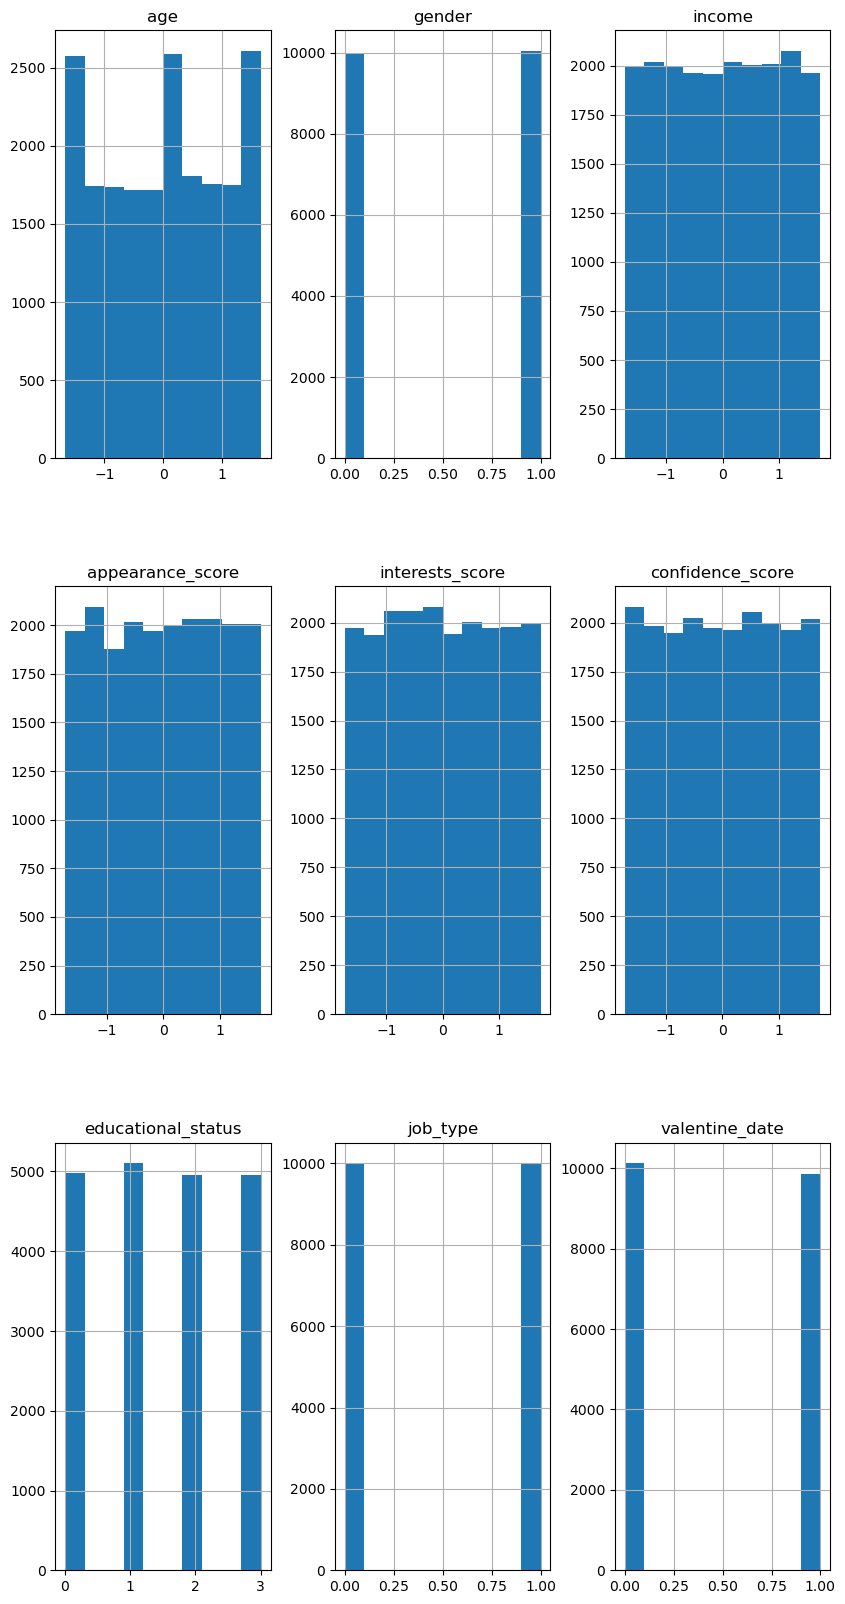

In [16]:
std_pre_df.hist(figsize=(10,20))

In [17]:
# <img src="./images/visual/vd/std_pre_d_hist.png">

In [17]:
feature_names = ['age', 'income', 'appearance_score', 'interests_score', 'confidence_score']
features = std_pre_df[feature_names]

for column in features.columns:
    std_pre_df.drop(
        std_pre_df[~std_pre_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_df[~std_pre_df[column].between(-1.96, 1.96)].shape[0]}건')

age: 0건
income: 0건
appearance_score: 0건
interests_score: 0건
confidence_score: 0건


In [18]:
std_pre_df

,age,gender,income,appearance_score,interests_score,confidence_score,educational_status,job_type,valentine_date
0,-0.458119,1,1.592499,0.478004,1.328635,-0.684104,0,0,1
1,-0.911135,1,1.244477,-1.649649,0.001020,0.915729,0,0,1
2,0.749922,1,-0.659865,-0.783905,-0.557829,-0.557457,3,0,1
3,1.202937,1,1.697812,-0.963287,-0.850808,-0.227552,2,1,1
4,1.353942,1,-0.377454,0.814259,-0.219670,-0.603008,0,0,0
...,...,...,...,...,...,...,...,...,...
19995,-0.458119,0,-0.790338,0.536182,-0.144253,1.287735,1,0,0
19996,-1.213145,0,0.306068,-0.622184,-1.066632,-1.450547,1,0,1
19997,0.296906,1,-1.046839,-0.177191,-1.251873,-0.354544,3,1,1
19998,0.598916,0,-1.590829,0.814952,0.498355,-0.703429,2,1,1


In [20]:
pre_df = std_pre_df

In [21]:
pre_df

,age,gender,income,appearance_score,interests_score,confidence_score,educational_status,job_type,valentine_date
0,-0.458119,1,1.592499,0.478004,1.328635,-0.684104,0,0,1
1,-0.911135,1,1.244477,-1.649649,0.001020,0.915729,0,0,1
2,0.749922,1,-0.659865,-0.783905,-0.557829,-0.557457,3,0,1
3,1.202937,1,1.697812,-0.963287,-0.850808,-0.227552,2,1,1
4,1.353942,1,-0.377454,0.814259,-0.219670,-0.603008,0,0,0
...,...,...,...,...,...,...,...,...,...
19995,-0.458119,0,-0.790338,0.536182,-0.144253,1.287735,1,0,0
19996,-1.213145,0,0.306068,-0.622184,-1.066632,-1.450547,1,0,1
19997,0.296906,1,-1.046839,-0.177191,-1.251873,-0.354544,3,1,1
19998,0.598916,0,-1.590829,0.814952,0.498355,-0.703429,2,1,1


In [19]:
# 이상치 없음

### 1-1. DTC

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

dtc = DecisionTreeClassifier()

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dtc.fit(X_train_over.values, y_train_over)

DecisionTreeClassifier()

#### graphviz 확인

In [23]:
class_names = targets.unique().astype(str)
class_names

array(['1', '0'], dtype='<U21')

In [24]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/pre_dtc01.dot', 
    class_names=class_names, 
    feature_names=features.columns,
    impurity=True, 
    filled=True
)

In [25]:
import graphviz

with open('./images/pre_dtc01.dot') as f:
    pre_dtc01 = f.read()

pre_dtc01_graph = graphviz.Source(pre_dtc01)

In [26]:
pre_dtc01_graph.render(filename='pre_dtc01', directory='./images', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.176531 to fit


'images\\pre_dtc01.png'

<img src='./images/pre_dtc01.png'>

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.5135

In [29]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': range(40, 49), 'min_samples_split': [110, 120, 130, 140, 150]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

g_dtc.fit(X_train_over, y_train_over)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 40, 'min_samples_split': 110}",0.505630,4,0.504638,0.505257,0.517007
1,"{'max_depth': 40, 'min_samples_split': 120}",0.504455,18,0.506494,0.501546,0.517625
2,"{'max_depth': 40, 'min_samples_split': 130}",0.504579,16,0.502783,0.500928,0.515770
3,"{'max_depth': 40, 'min_samples_split': 140}",0.503714,32,0.497217,0.502783,0.514533
4,"{'max_depth': 40, 'min_samples_split': 150}",0.503405,33,0.500309,0.499691,0.520099
5,"{'max_depth': 41, 'min_samples_split': 110}",0.504764,13,0.505257,0.504638,0.517007
6,"{'max_depth': 41, 'min_samples_split': 120}",0.504826,11,0.506494,0.501546,0.517625
7,"{'max_depth': 41, 'min_samples_split': 130}",0.504208,21,0.501546,0.502165,0.515770
8,"{'max_depth': 41, 'min_samples_split': 140}",0.502847,41,0.497835,0.502783,0.514533
9,"{'max_depth': 41, 'min_samples_split': 150}",0.503714,30,0.501546,0.499691,0.520099


In [31]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=42, min_samples_split=110)

In [32]:
from sklearn.metrics import accuracy_score
import numpy as np

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 63.175%


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[1232  795]
 [ 678 1295]]
정확도: 0.6318, 정밀도: 0.6196, 재현율: 0.6564, F1: 0.6375, ROC-AUC: 0.6321
################################################################################


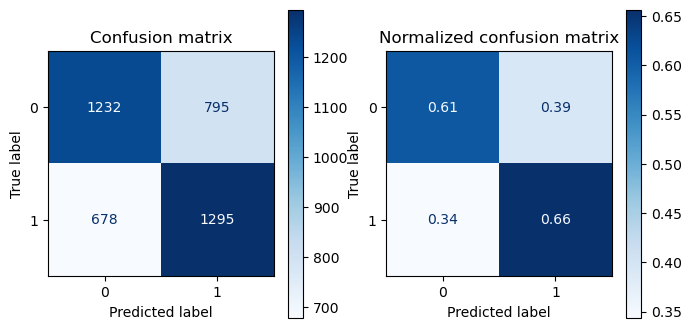

In [34]:
get_evaluation(y_test, prediction, dtc, X_test)

### ☝️정밀도와 재현율 수립
TP: 이 경우는 모델이 데이트가 있는 사람을 1로 예측했고, 실제로도 그 사람이 데이트가 있는 경우이다.  
모델이 예측을 정확히 맞춘 경우이다.  
FP: 모델이 데이트가 있다고 예측했지만 (1로 예측), 실제로는 데이트가 없는 사람 (0)을 데이트가 있다고 잘못 예측한 경우이다. (error 1)  
TN: 모델이 데이트가 없다고 예측했고 (0으로 예측), 실제로 데이트가 없는 경우이다 (0).  
이 경우에도 모델의 예측이 정확한 경우이다.  
FN: 모델이 데이트가 없다고 예측했지만 (0으로 예측), 실제로는 그 사람이 데이트가 있는 경우이다.  
이는 또 다른 유형의 오류로, 모델이 실제 상황을 잘못 예측한 경우이다. (error 2)  

#### 🤔 과연 어떤 오류가 더 치멱정인 오류일까??
(만약 내가 발렌타인 데이에 프로모션을 진행한다고 가정을 한다.)
1. <strong>error 1의 경우는</strong> 프로모션의 대상이 되어야 할 사람들이 프로모션을 받지 못하게 된다.
   즉, 잠재적 매출을 증가시킬 수 있는 <strong>고객을 놓치게 되고</strong>, 고객 충성도나 만족도에 <strong>부정적인 영향</strong>을 미칠 수 있다.
2. <strong>error 2의 경우는</strong> 프로모션 대상이 아닌 사람들에게도 프로모션이 제공되는 상황이다.
   이러한 오류는 <strong>프로모션 비용의 낭비</strong>로 이어지게 된다. <strong>하지만 프로모션 대상이 아닌 사람들에게도 프로모션이 제공이 된다면</strong> 오히려 긍정적인 반응이 있을 수 있으므로, <strong>긍정적인 효과</strong>로 이어질 수 있다.

#### 💡따라서, <strong>FN을 낮춰 재현율을 높이는 쪽</strong>이 적합한 방향일듯 하다.

In [43]:
# <img src="./images/visual/vd/dtc_confusion.png">

In [35]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.25925925925925924, 0.7407407407407407] 1
[0.6730769230769231, 0.3269230769230769] 0
[0.6388888888888888, 0.3611111111111111] 0
[0.3883495145631068, 0.6116504854368932] 1
[0.5897435897435898, 0.41025641025641024] 0
[0.627906976744186, 0.37209302325581395] 0
[0.2909090909090909, 0.7090909090909091] 1
[0.2608695652173913, 0.7391304347826086] 1
[0.5876288659793815, 0.41237113402061853] 0
[0.6282051282051282, 0.3717948717948718] 0
[0.46226415094339623, 0.5377358490566038] 1
[0.8461538461538461, 0.15384615384615385] 0
[0.6509433962264151, 0.3490566037735849] 0
[0.65, 0.35] 0
[0.7333333333333333, 0.26666666666666666] 0
[0.6067415730337079, 0.39325842696629215] 0
[0.6238532110091743, 0.3761467889908257] 0
[0.631578947368421, 0.3684210526315789] 0
[0.6829268292682927, 0.3170731707317073] 0
[0.0, 1.0] 1
[0.7272727272727273, 0.2727272727272727] 0
[0.7777777777777778, 0.2222222222222222] 0
[0.611764705882353, 0.38823529411764707] 0
[0.6282051282051282, 0.3717948717948718] 0
[0.6176470588235294,

In [36]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [37]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[1232  795]
 [ 678 1295]]
정확도: 0.6318, 정밀도: 0.6196, 재현율: 0.6564, F1: 0.6375, ROC-AUC: 0.6321
################################################################################


In [47]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

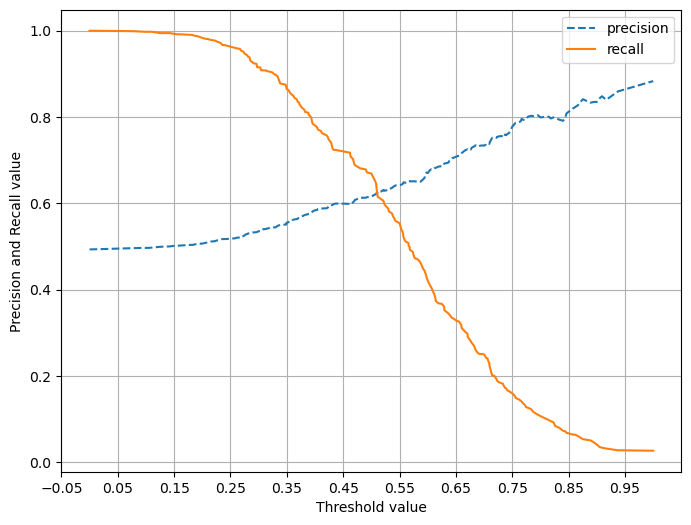

In [48]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

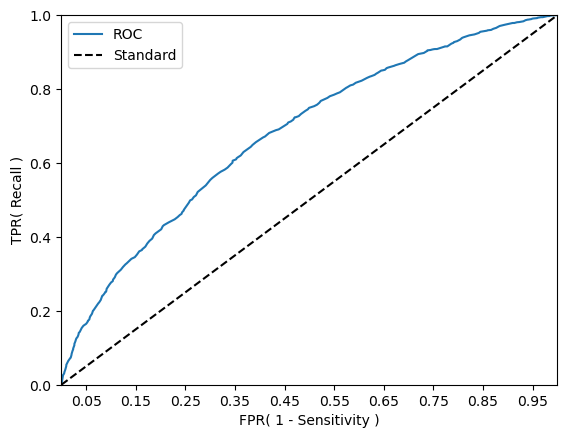

In [49]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [50]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 63.175%


In [51]:
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.07692308, 0.09090909, 0.1       , 0.10526316,
       0.11111111, 0.125     , 0.14285714, 0.15      , 0.15384615,
       0.16666667, 0.17241379, 0.18181818, 0.18461538, 0.1875    ,
       0.19047619, 0.19354839, 0.2       , 0.20588235, 0.21052632,
       0.21428571, 0.21568627, 0.22222222, 0.22727273, 0.23076923,
       0.23333333, 0.23529412, 0.24      , 0.24285714, 0.25      ,
       0.25806452, 0.25925926, 0.26190476, 0.26666667, 0.26829268,
       0.26923077, 0.27272727, 0.2745098 , 0.27692308, 0.28      ,
       0.28125   , 0.28395062, 0.28440367, 0.28571429, 0.28947368,
       0.29032258, 0.2962963 , 0.2972973 , 0.3       , 0.3030303 ,
       0.30337079, 0.30434783, 0.30769231, 0.31372549, 0.31428571,
       0.31707317, 0.32075472, 0.32467532, 0.32692308, 0.33027523,
       0.33333333, 0.33823529, 0.34782609, 0.34883721, 0.3490566 ,
       0.35      , 0.35238095, 0.35483871, 0.35526316, 0.35897436,
       0.36      , 0.36111111, 0.36363636, 0.36734694, 0.36842

In [52]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.0
오차 행렬
[[  27 2000]
 [   2 1971]]
정확도: 0.4995, 정밀도: 0.4963, 재현율: 0.9990, F1: 0.6632, ROC-AUC: 0.5062
################################################################################
0.07692307692307693
오차 행렬
[[  32 1995]
 [   4 1969]]
정확도: 0.5002, 정밀도: 0.4967, 재현율: 0.9980, F1: 0.6633, ROC-AUC: 0.5069
################################################################################
0.09090909090909091
오차 행렬
[[  33 1994]
 [   5 1968]]
정확도: 0.5002, 정밀도: 0.4967, 재현율: 0.9975, F1: 0.6632, ROC-AUC: 0.5069
################################################################################
0.1
오차 행렬
[[  34 1993]
 [   5 1968]]
정확도: 0.5005, 정밀도: 0.4968, 재현율: 0.9975, F1: 0.6633, ROC-AUC: 0.5071
################################################################################
0.10526315789473684
오차 행렬
[[  40 1987]
 [   5 1968]]
정확도: 0.5020, 정밀도: 0.4976, 재현율: 0.9975, F1: 0.6640, ROC-AUC: 0.5086
################################################################################
0.1111111111111111
오차 행렬
[[

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [54]:
from sklearn.preprocessing import Binarizer

threshold = 0.4657534246575342

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

오차 행렬
[[1110  917]
 [ 586 1387]]
정확도: 0.6242, 정밀도: 0.6020, 재현율: 0.7030, F1: 0.6486, ROC-AUC: 0.6253
################################################################################


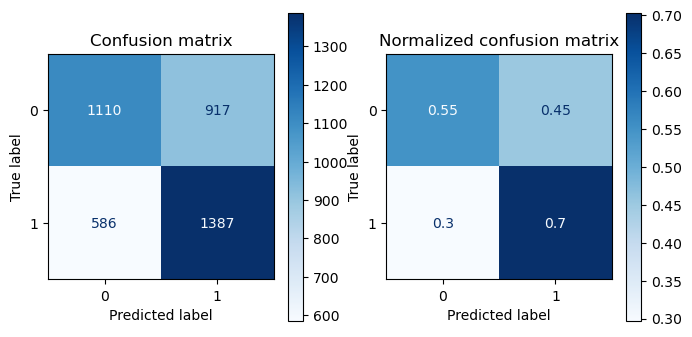

In [66]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

dtc_ac = round(accuracy_score(y_test , custom_prediction), 4)
dtc_pr = round(precision_score(y_test , custom_prediction), 4)
dtc_rc = round(recall_score(y_test , custom_prediction), 4)
dtc_f1 = round(f1_score(y_test , custom_prediction), 4)
dtc_rac =round(roc_auc_score(y_test , custom_prediction), 4)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

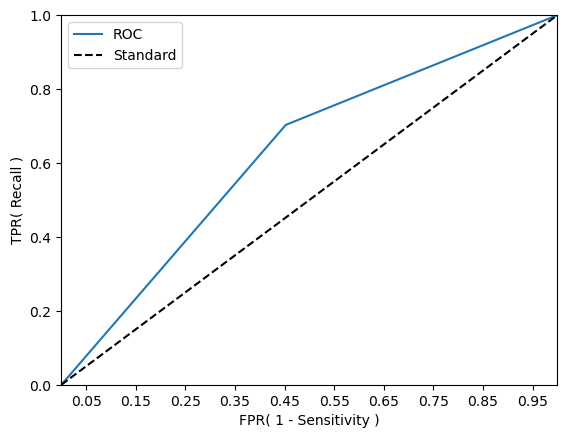

In [67]:
roc_curve_plot(y_test, custom_prediction)

In [82]:
print(f"정확도: {dtc_ac}, 정밀도: {dtc_pr}, 재현율: {dtc_rc}, F1 점수: {dtc_f1}, ROC-AUC: {dtc_rac}")

정확도: 0.6242, 정밀도: 0.602, 재현율: 0.703, F1 점수: 0.6486, ROC-AUC: 0.6253


#### 📌 Cycle 1-1
DCT를 사용하여 <strong>임계치를 0.5로</strong> 두었을 때는  
<strong>정확도: 0.6318, 정밀도: 0.6196, 재현율: 0.6564, F1: 0.6375, ROC-AUC: 0.6321</strong>이 나왔고,  
위에서 수립했던 결과, 재현율을 조금 더 높이게 위해 <strong>임계치를 0.4657534246575342로 조정</strong> 했을 때,  
<strong>정확도: 0.6242, 정밀도: 0.6020, 재현율: 0.7030, F1: 0.6486, ROC-AUC: 0.6253</strong>이 나왔다.  
이는 정확도와 ROC-AUC, 정밀도 점수가 미세하게 떨어지긴 했지만 <strong>재현율과 F1 점수는 상승한 것</strong>을 알 수 있다.

#### KNN을 사용해보도록 하겠다.

### 1-2. KNN

In [76]:
y_train_over.value_counts()

valentine_date
1    8084
0    8084
Name: count, dtype: int64

In [77]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7]
}

g_knn = GridSearchCV(knn, param_grid=parameters, cv=5, refit=True, return_train_score=True)
# g_knn.fit(X_train, y_train)
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [78]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.506742,1
1,{'n_neighbors': 5},0.505504,3
2,{'n_neighbors': 7},0.505998,2


In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [88]:
knn = g_knn.best_estimator_
prediction = knn.predict(X_test)
knn_ac = round(accuracy_score(y_test , prediction), 4)
knn_pr = round(precision_score(y_test , prediction), 4)
knn_rc = round(recall_score(y_test , prediction), 4)
knn_f1 = round(f1_score(y_test , prediction), 4)
knn_rac =round(roc_auc_score(y_test , prediction), 4)

In [91]:
print(knn)

KNeighborsClassifier(n_neighbors=3)


오차 행렬
[[1448  579]
 [ 583 1390]]
정확도: 0.7095, 정밀도: 0.7094, 재현율: 0.7094, F1: 0.7094
################################################################################


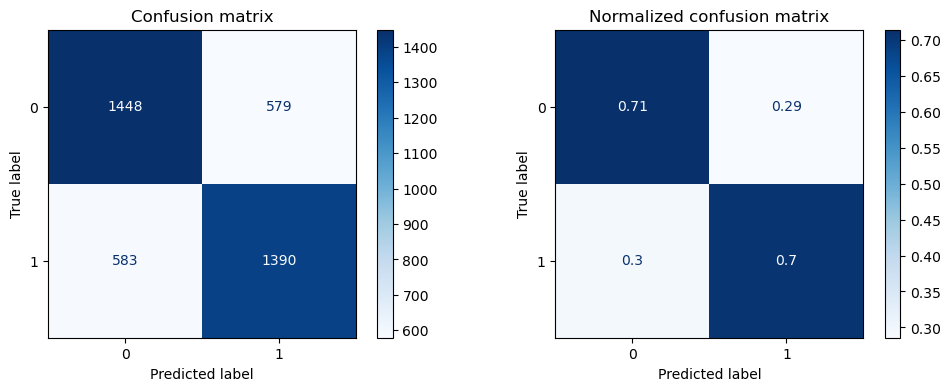

In [89]:
get_evaluation(y_test, prediction, knn, X_test)

In [90]:
print(f"정확도: {knn_ac}, 정밀도: {knn_pr}, 재현율: {knn_rc}, F1 점수: {knn_f1}, ROC-AUC: {knn_rac}")

정확도: 0.7095, 정밀도: 0.7059, 재현율: 0.7045, F1 점수: 0.7052, ROC-AUC: 0.7094


#### 📌 Cycle 1-2
KNN을 사용하여 <strong>n_neighbors=3</strong>일 때,  
<strong>정확도: 0.7095, 정밀도: 0.7059, 재현율: 0.7045, F1 점수: 0.7052, ROC-AUC: 0.7094</strong>로 꽤 DTC보다 전체적으로 <strong>높은 성능</strong>이 나왔다.  

<strong>다음으로는 bagging의 Random Forest을 사용해보도록 하겠다.</strong>

### 1-3. Random Forest

In [102]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

parameters = {'max_depth': range(40, 44), 'min_samples_split': [110, 120, 130, 140]}

rfc = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=10, n_jobs=-1)

# g_rfc.fit(X_train, y_train)
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(40, 44),
                         'min_samples_split': [110, 120, 130, 140]})

In [103]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 40, 'min_samples_split': 110}",0.512185,2
1,"{'max_depth': 40, 'min_samples_split': 120}",0.505938,13
2,"{'max_depth': 40, 'min_samples_split': 130}",0.511195,5
3,"{'max_depth': 40, 'min_samples_split': 140}",0.512000,3
4,"{'max_depth': 41, 'min_samples_split': 110}",0.512680,1
5,"{'max_depth': 41, 'min_samples_split': 120}",0.508721,7
6,"{'max_depth': 41, 'min_samples_split': 130}",0.504514,16
7,"{'max_depth': 41, 'min_samples_split': 140}",0.507607,10
8,"{'max_depth': 42, 'min_samples_split': 110}",0.504762,15
9,"{'max_depth': 42, 'min_samples_split': 120}",0.511875,4


In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [105]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)
rfc_ac = round(accuracy_score(y_test , prediction), 4)
rfc_pr = round(precision_score(y_test , prediction), 4)
rfc_rc = round(recall_score(y_test , prediction), 4)
rfc_f1 = round(f1_score(y_test , prediction), 4)
rfc_rac =round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[1493  534]
 [ 521 1452]]
정확도: 0.7362, 정밀도: 0.7362, 재현율: 0.7362, F1: 0.7362
################################################################################


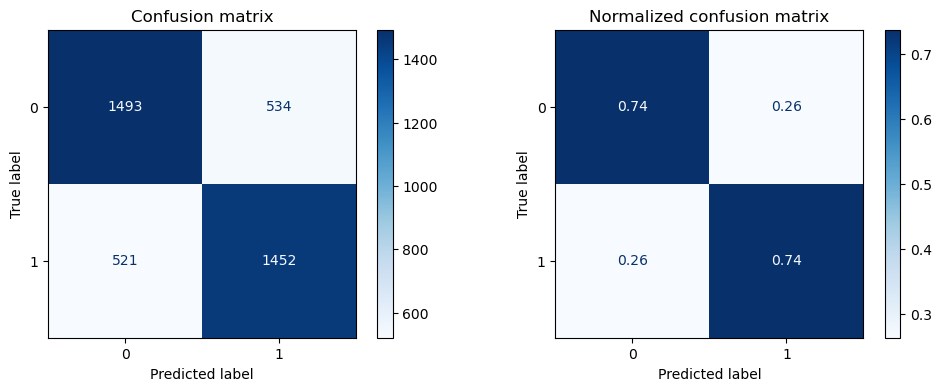

In [106]:
get_evaluation(y_test, prediction, rfc, X_test)

In [107]:
print(rfc)

RandomForestClassifier(max_depth=41, min_samples_split=110)


In [108]:
print(f"정확도: {rfc_ac}, 정밀도: {rfc_pr}, 재현율: {rfc_rc}, F1 점수: {rfc_f1}, ROC-AUC: {rfc_rac}")

정확도: 0.7362, 정밀도: 0.7311, 재현율: 0.7359, F1 점수: 0.7335, ROC-AUC: 0.7362


#### 📌 Cycle 3  
Radom Forest가 DTC, KNN보다 더 높은 결과가 나왔다.

### 4. 각 분류기 비교 시각화 그래프

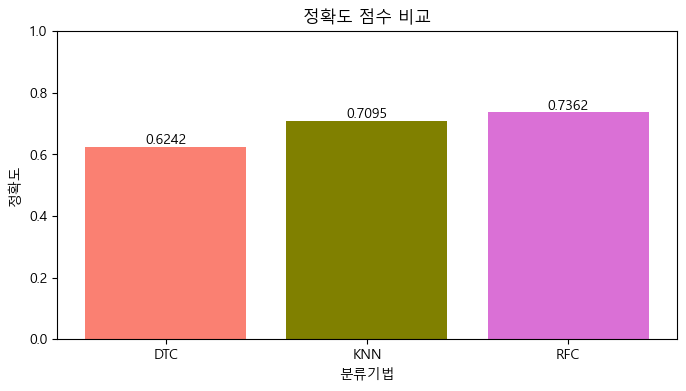

In [111]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(8,4))
colors = ['salmon', 'olive', 'orchid']
accuracies = [dtc_ac,
           knn_ac,
           rfc_ac
             ]
classifiers = ['DTC', 'KNN', 'RFC']
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('분류기법')
plt.ylabel('정확도')
plt.title('정확도 점수 비교')
plt.ylim(0, 1)
# plt.xticks(rotation=60)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

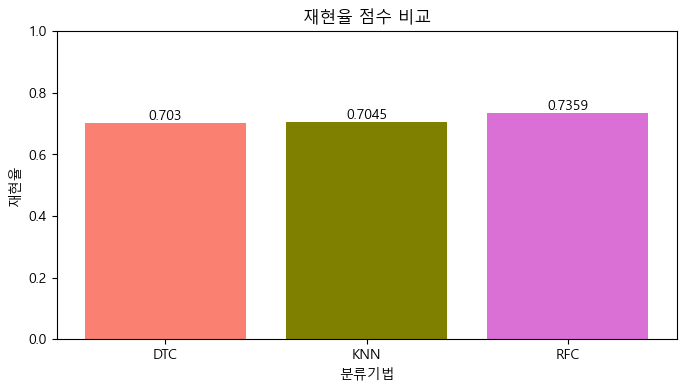

In [112]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(8,4))
colors = ['salmon', 'olive', 'orchid']
recalls = [dtc_rc,
           knn_rc,
           rfc_rc
             ]
classifiers = ['DTC', 'KNN', 'RFC']
plt.bar(classifiers, recalls, color=colors)
plt.xlabel('분류기법')
plt.ylabel('재현율')
plt.title('재현율 점수 비교')
plt.ylim(0, 1)
# plt.xticks(rotation=60)

for i, v in enumerate(recalls):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

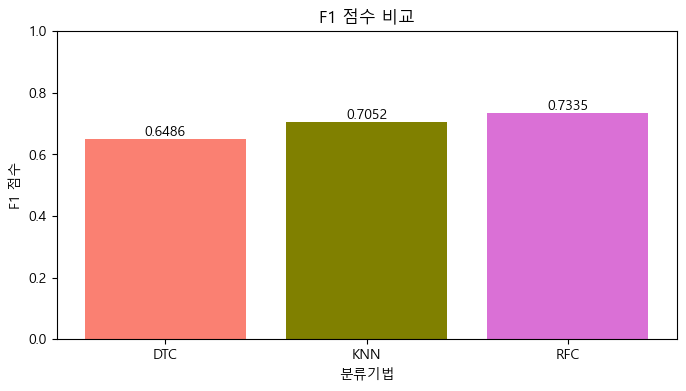

In [113]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(8,4))
colors = ['salmon', 'olive', 'orchid']
f1s = [dtc_f1,
           knn_f1,
           rfc_f1
             ]
classifiers = ['DTC', 'KNN', 'RFC']
plt.bar(classifiers, f1s, color=colors)
plt.xlabel('분류기법')
plt.ylabel('F1 점수')
plt.title('F1 점수 비교')
plt.ylim(0, 1)
# plt.xticks(rotation=60)

for i, v in enumerate(f1s):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

### 📝 결과  
DTC, KNN, RFC를 각각 사용했을 때, RFC를 사용했을 때의 정확도, 재현율, F1 점수가 가장 높게 나왔다.  
다음으로는 앙상블 학습의 Voting, Bagging, Boosting을 통해 각 결과들을 확인 해보도록 하겠다. 

### 2. Voting

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dtc_parameters = {'max_depth': range(40, 44), 'min_samples_split': [110, 120, 130, 140]}

dtc = DecisionTreeClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [126]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7, 11]
}

g_knn = GridSearchCV(knn, param_grid=parameters, cv=5, refit=True, return_train_score=True)
# g_knn.fit(X_train, y_train)

In [127]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

parameters = {'max_depth': range(40, 44), 'min_samples_split': [110, 120, 130, 140]}

rfc = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=10, n_jobs=-1)

In [128]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(40, 44),
                         'min_samples_split': [110, 120, 130, 140]},
             return_train_score=True)

In [129]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 11]},
             return_train_score=True)

In [136]:
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(40, 44),
                         'min_samples_split': [110, 120, 130, 140]})

In [137]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

print(dtc_result_df[dtc_result_df['rank_test_score'] == 1])
# print(g_dtc.best_estimator_)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 40, 'min_samples_split': 110}",0.504269,15
1,"{'max_depth': 40, 'min_samples_split': 120}",0.505320,11
2,"{'max_depth': 40, 'min_samples_split': 130}",0.504825,13
3,"{'max_depth': 40, 'min_samples_split': 140}",0.505381,10
4,"{'max_depth': 41, 'min_samples_split': 110}",0.505196,12
5,"{'max_depth': 41, 'min_samples_split': 120}",0.506124,5
6,"{'max_depth': 41, 'min_samples_split': 130}",0.505381,9
7,"{'max_depth': 41, 'min_samples_split': 140}",0.506495,3
8,"{'max_depth': 42, 'min_samples_split': 110}",0.504269,15
9,"{'max_depth': 42, 'min_samples_split': 120}",0.505938,7


                                         params  mean_test_score  \
11  {'max_depth': 42, 'min_samples_split': 140}         0.507113   

    rank_test_score  
11                1  


In [138]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

knn = g_knn.best_estimator_
print(knn_result_df[knn_result_df['rank_test_score'] == 1])

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.506742,2
1,{'n_neighbors': 5},0.505504,4
2,{'n_neighbors': 7},0.505998,3
3,{'n_neighbors': 11},0.507175,1


                params  mean_test_score  rank_test_score
3  {'n_neighbors': 11}         0.507175                1


In [139]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

rfc = g_rfc.best_estimator_
print(rfc_result_df[rfc_result_df['rank_test_score'] == 1])

,params,mean_test_score,rank_test_score
0,"{'max_depth': 40, 'min_samples_split': 110}",0.507794,12
1,"{'max_depth': 40, 'min_samples_split': 120}",0.505196,15
2,"{'max_depth': 40, 'min_samples_split': 130}",0.510576,3
3,"{'max_depth': 40, 'min_samples_split': 140}",0.510391,4
4,"{'max_depth': 41, 'min_samples_split': 110}",0.509525,7
5,"{'max_depth': 41, 'min_samples_split': 120}",0.508289,10
6,"{'max_depth': 41, 'min_samples_split': 130}",0.508783,9
7,"{'max_depth': 41, 'min_samples_split': 140}",0.510763,2
8,"{'max_depth': 42, 'min_samples_split': 110}",0.505813,14
9,"{'max_depth': 42, 'min_samples_split': 120}",0.502722,16


                                         params  mean_test_score  \
10  {'max_depth': 42, 'min_samples_split': 130}         0.513547   

    rank_test_score  
10                1  


In [145]:
from sklearn.ensemble import VotingClassifier

# 하드 보팅
vch = VotingClassifier(estimators=[('dtc', dtc), 
                                  ('knn', knn), 
                                  ('rfc', rfc)], 
                                  voting='hard', 
                                  n_jobs=-1)

In [149]:
vch.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=42,
                                                     min_samples_split=140)),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('rfc',
                              RandomForestClassifier(max_depth=42,
                                                     min_samples_split=130))],
                 n_jobs=-1)

In [150]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [152]:
prediction = vch.predict(X_test)
hv_ac = round(accuracy_score(y_test , prediction), 4)
hv_pr = round(precision_score(y_test , prediction), 4)
hv_rc = round(recall_score(y_test , prediction), 4)
hv_f1 = round(f1_score(y_test , prediction), 4)
hv_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[1410  617]
 [ 570 1403]]
정확도: 0.7033, 정밀도: 0.6946, 재현율: 0.7111, F1: 0.7027, ROC-AUC: 0.7034
################################################################################


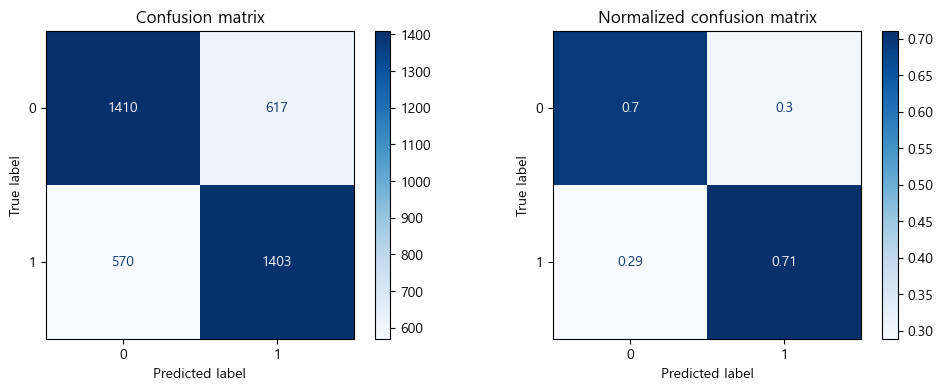

In [153]:
get_evaluation(y_test, prediction, vch, X_test)

<!-- ### 하드 보팅(Hard Voting)
<img src="./images/hard_voting_pre.png">  

### 소프트 보팅(soft Voting)
<img src="./images/soft_voting_pre.png"> -->

In [154]:
from sklearn.ensemble import VotingClassifier

# 하드 보팅
vcs = VotingClassifier(estimators=[('dtc', dtc), 
                                  ('knn', knn), 
                                  ('rfc', rfc)], 
                                  voting='hard', 
                                  n_jobs=-1)

In [155]:
vcs.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=42,
                                                     min_samples_split=140)),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('rfc',
                              RandomForestClassifier(max_depth=42,
                                                     min_samples_split=130))],
                 n_jobs=-1)

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [157]:
prediction = vcs.predict(X_test)
sv_ac = round(accuracy_score(y_test , prediction), 4)
sv_pr = round(precision_score(y_test , prediction), 4)
sv_rc = round(recall_score(y_test , prediction), 4)
sv_f1 = round(f1_score(y_test , prediction), 4)
sv_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[1386  641]
 [ 584 1389]]
정확도: 0.6937, 정밀도: 0.6842, 재현율: 0.7040, F1: 0.6940, ROC-AUC: 0.6939
################################################################################


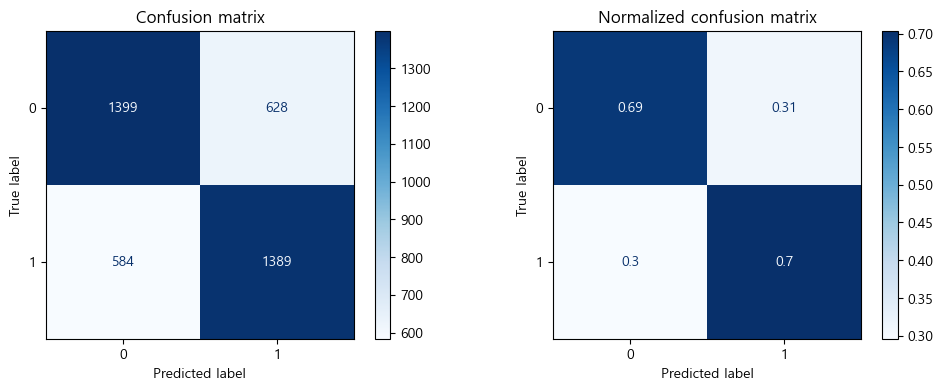

In [158]:
get_evaluation(y_test, prediction, vc, X_test)

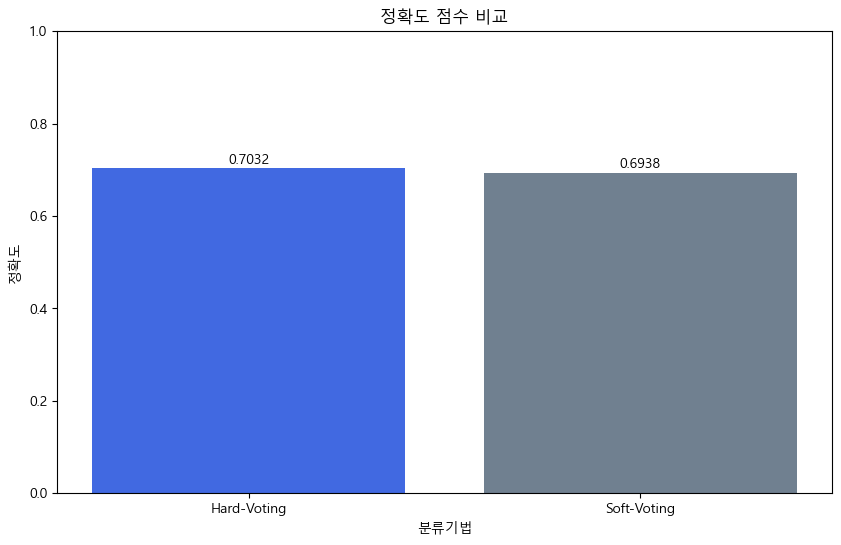

In [164]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
colors = ['royalblue', 'slategrey']
accuracies = [hv_ac,
           sv_ac,
             ]
classifiers = ['Hard-Voting', 'Soft-Voting']
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('분류기법')
plt.ylabel('정확도')
plt.title('정확도 점수 비교')
plt.ylim(0, 1)
# plt.xticks(rotation=60)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

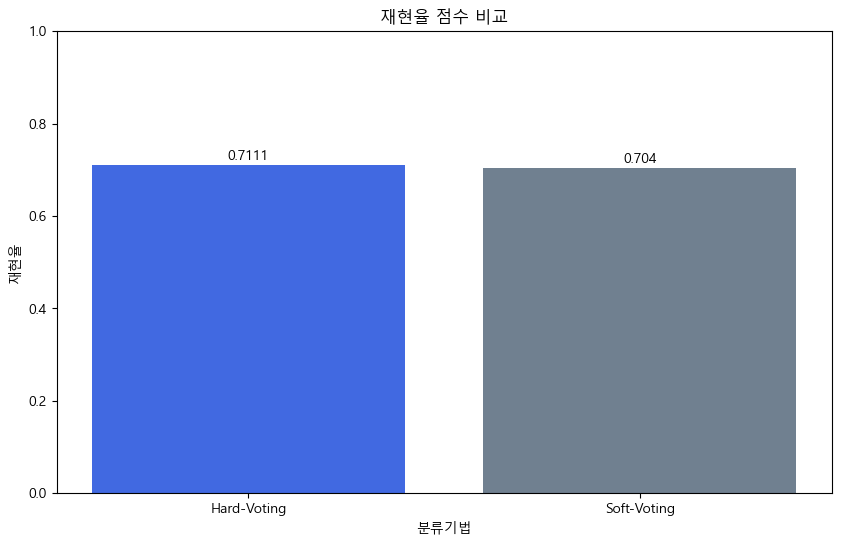

In [163]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
colors = ['royalblue', 'slategrey']
recalls = [hv_rc,
           sv_rc,
             ]
classifiers = ['Hard-Voting', 'Soft-Voting']
plt.bar(classifiers, recalls, color=colors)
plt.xlabel('분류기법')
plt.ylabel('재현율')
plt.title('재현율 점수 비교')
plt.ylim(0, 1)
# plt.xticks(rotation=60)

for i, v in enumerate(recalls):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

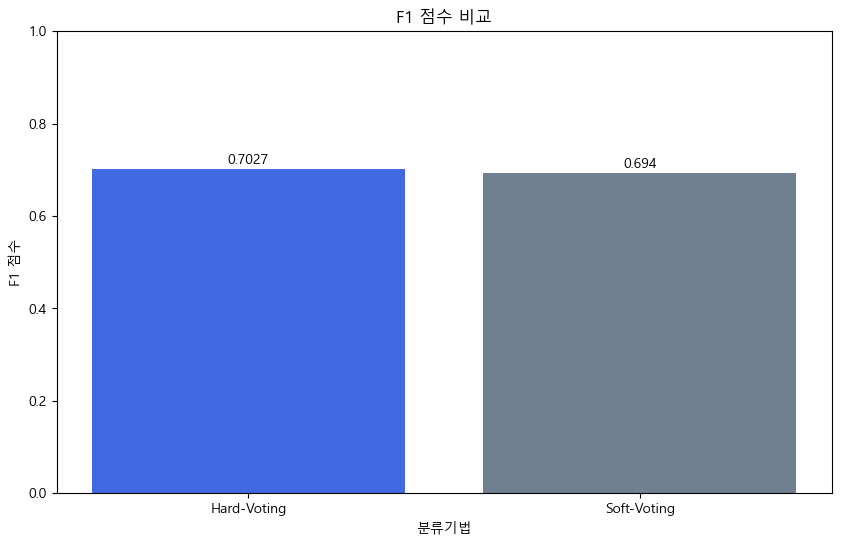

In [162]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
colors = ['royalblue', 'slategrey']
f1s = [hv_f1,
           sv_f1,
             ]
classifiers = ['Hard-Voting', 'Soft-Voting']
plt.bar(classifiers, f1s, color=colors)
plt.xlabel('분류기법')
plt.ylabel('F1 점수')
plt.title('F1 점수 비교')
plt.ylim(0, 1)
# plt.xticks(rotation=60)

for i, v in enumerate(f1s):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

### 📝 결과  
Voting 중에서 Hard Voting과 Soft Voting을 각각 사용했을 때, <strong>정확도가 Hard Voting이</strong> 0.7032, Soft Voting이 0.6938로  <strong>더 높은</strong> 정확도가 나왔다.  
그 외에도 <strong>재현율, F1 점수도 Hard Voting이 더 높은 것으로</strong> 나왔다.  
<strong>그리고 이 다음으로는 Boosting의 Adaboost, GBM, XGBoost, LightGBM 사용해보도록 하겠다.<strong>

### 3-1. AdaBoosting

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parmeters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parmeters, cv=5, n_jobs=-1, refit=True, return_train_score=True)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [189]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.500309,4
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.501051,1
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.496784,10
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.500556,3
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.500557,2
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.500186,5
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.498701,6
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.498268,7
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.497774,8
9,"{'learning_rate': 1, 'n_estimators': 50}",0.497217,9


In [190]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [191]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)
ada_ac = round(accuracy_score(y_test , prediction), 4)
ada_pr = round(precision_score(y_test , prediction), 4)
ada_rc = round(recall_score(y_test , prediction), 4)
ada_f1 = round(f1_score(y_test , prediction), 4)
ada_rac = round(roc_auc_score(y_test , prediction), 4)

In [193]:
print(ada)

AdaBoostClassifier(learning_rate=0.3, n_estimators=100)


오차 행렬
[[ 978 1049]
 [ 892 1081]]
정확도: 0.5148, 정밀도: 0.5075, 재현율: 0.5479, F1: 0.5269, ROC-AUC: 0.5152
################################################################################


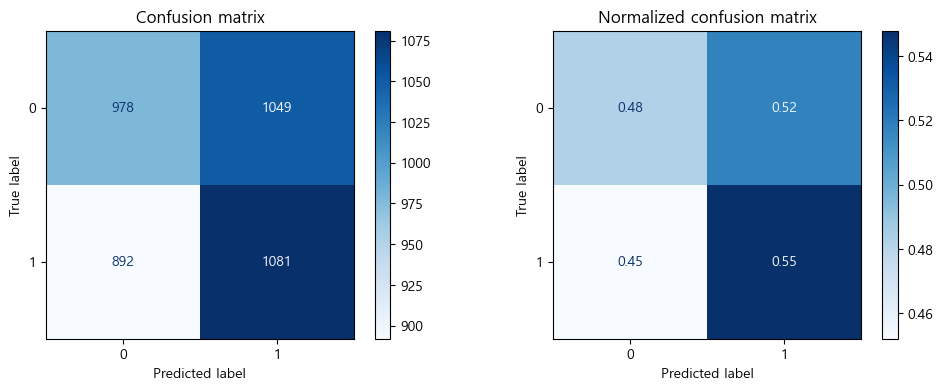

In [192]:
get_evaluation(y_test, prediction, ada, X_test)

### 📌 3-1. Cycle (Adabosst)  
Adabosst를 사용하여  
<strong>learning_rate=0.3, n_estimators=100으로 설정</strong> 했을 때가 가장 성능이 좋은 것으로 나왔지만,  
<strong>정확도: 0.5148, 정밀도: 0.5075, 재현율: 0.5479, F1: 0.5269, ROC-AUC: 0.5152</strong>로서 다른 분류기들보다 <strong>저조한 성능</strong>인듯 하다.  
<strong>다음으로는 GBM을 사용해보도록 하겠다.</strong>

### 3-2. GBM(Gradient Boost Machine)

In [181]:
pre_df

,age,gender,income,appearance_score,interests_score,confidence_score,educational_status,job_type,valentine_date
0,-0.458119,1,1.592499,0.478004,1.328635,-0.684104,0,0,1
1,-0.911135,1,1.244477,-1.649649,0.001020,0.915729,0,0,1
2,0.749922,1,-0.659865,-0.783905,-0.557829,-0.557457,3,0,1
3,1.202937,1,1.697812,-0.963287,-0.850808,-0.227552,2,1,1
4,1.353942,1,-0.377454,0.814259,-0.219670,-0.603008,0,0,0
...,...,...,...,...,...,...,...,...,...
19995,-0.458119,0,-0.790338,0.536182,-0.144253,1.287735,1,0,0
19996,-1.213145,0,0.306068,-0.622184,-1.066632,-1.450547,1,0,1
19997,0.296906,1,-1.046839,-0.177191,-1.251873,-0.354544,3,1,1
19998,0.598916,0,-1.590829,0.814952,0.498355,-0.703429,2,1,1


In [183]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3, n_jobs=-1, refit=True, return_train_score=True)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [184]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [185]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)
gbc_ac = round(accuracy_score(y_test , prediction), 4)
gbc_pr = round(precision_score(y_test , prediction), 4)
gbc_rc = round(recall_score(y_test , prediction), 4)
gbc_f1 = round(f1_score(y_test , prediction), 4)
gbc_rac = round(roc_auc_score(y_test , prediction), 4)

In [187]:
print(gbc)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=500)


오차 행렬
[[1533  494]
 [ 506 1467]]
정확도: 0.7500, 정밀도: 0.7481, 재현율: 0.7435, F1: 0.7458, ROC-AUC: 0.7499
################################################################################


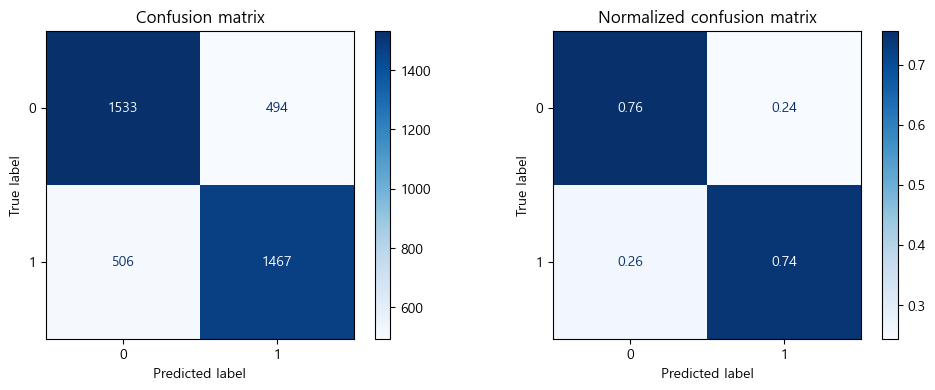

In [186]:
get_evaluation(y_test, prediction, gbc, X_test)

### 📌 3-2. Cycle (GBM)  
지금까지의 분류기법 중에서 <strong>GBM이 가장 높은 성능</strong>을 보인다.  
<strong>learning_rate=0.5, n_estimators=500</strong>
<strong>정확도: 0.7500, 정밀도: 0.7481, 재현율: 0.7435, F1: 0.7458, ROC-AUC: 0.7499</strong>로써 그전까지 가장 높았던, <strong>RFC보다도 더 높은 성능</strong>이다.  
<strong>다음으론 XGBoost를 사용해보도록 하겠다.</strong>

### 3-3. XGBoost(eXtra Gradient Boosting)

In [194]:
from sklearn.model_selection import train_test_split

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [195]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.68427	validation_1-logloss:0.68477
[1]	validation_0-logloss:0.67642	validation_1-logloss:0.67557
[2]	validation_0-logloss:0.67054	validation_1-logloss:0.66752
[3]	validation_0-logloss:0.66409	validation_1-logloss:0.66325
[4]	validation_0-logloss:0.65743	validation_1-logloss:0.65414
[5]	validation_0-logloss:0.65190	validation_1-logloss:0.64996
[6]	validation_0-logloss:0.64266	validation_1-logloss:0.64147
[7]	validation_0-logloss:0.63662	validation_1-logloss:0.63667
[8]	validation_0-logloss:0.63312	validation_1-logloss:0.63475
[9]	validation_0-logloss:0.62796	validation_1-logloss:0.62836
[10]	validation_0-logloss:0.62087	validation_1-logloss:0.62127
[11]	validation_0-logloss:0.61608	validation_1-logloss:0.61446
[12]	validation_0-logloss:0.60984	validation_1-logloss:0.60417
[13]	validation_0-logloss:0.60300	validation_1-logloss:0.59629
[14]	validation_0-logloss:0.59799	validation_1-logloss:0.59158
[15]	validation_0-logloss:0.59211	validation_1-logloss:0.58596
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[68]	validation_0-logloss:0.35940	validation_1-logloss:0.35270
[69]	validation_0-logloss:0.35622	validation_1-logloss:0.34956
[70]	validation_0-logloss:0.35361	validation_1-logloss:0.34756
[71]	validation_0-logloss:0.35050	validation_1-logloss:0.34390
[72]	validation_0-logloss:0.34728	validation_1-logloss:0.33967
[73]	validation_0-logloss:0.34462	validation_1-logloss:0.33705
[74]	validation_0-logloss:0.34090	validation_1-logloss:0.33383
[75]	validation_0-logloss:0.33802	validation_1-logloss:0.33160
[76]	validation_0-logloss:0.33494	validation_1-logloss:0.32895
[77]	validation_0-logloss:0.33245	validation_1-logloss:0.32648
[78]	validation_0-logloss:0.33040	validation_1-logloss:0.32421
[79]	validation_0-logloss:0.32808	validation_1-logloss:0.32185
[80]	validation_0-logloss:0.32649	validation_1-logloss:0.32051
[81]	validation_0-logloss:0.32341	validation_1-logloss:0.31840
[82]	validation_0-logloss:0.32050	validation_1-logloss:0.31639
[83]	validation_0-logloss:0.31727	validation_1-logloss:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [196]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.500500,5
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.500437,6
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.494812,11
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.503813,2
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.499688,7
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.493938,12
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.502062,3
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.498375,9
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.498938,8
9,"{'learning_rate': 1, 'n_estimators': 50}",0.500750,4


In [197]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [198]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)
xgb_ac = round(accuracy_score(y_test , prediction), 4)
xgb_pr = round(precision_score(y_test , prediction), 4)
xgb_rc = round(recall_score(y_test , prediction), 4)
xgb_f1 = round(f1_score(y_test , prediction), 4)
xgb_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[1022 1005]
 [1028  945]]
정확도: 0.4918, 정밀도: 0.4846, 재현율: 0.4790, F1: 0.4818, ROC-AUC: 0.4916
################################################################################


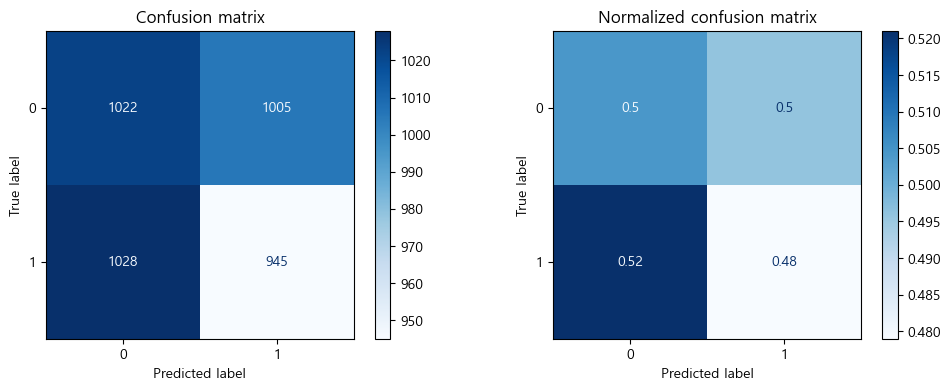

In [199]:
get_evaluation(y_test, prediction, xgb, X_test)

### 📌 3-3. Cycle  
Adaboost, GBM을 사용했을 때 보다 전체적으로 <strong>성능이 많이 떨어진 것</strong>으로 나타났다.  
<strong>마지막으로 LightGBM을을 사용하여 확인해보도록 하겠다.</strong>

### 3-4. LightGBM(Light Gradient Boosting Machine)

In [200]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Number of positive: 8084, number of negative: 8084
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 16168, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [201]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)

lgbm = g_lgbm.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.501114,11
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.508782,4
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.507360,6
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.500742,12
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.508041,5
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.505814,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.512556,2
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.505072,9
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.512742,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.509896,3


In [202]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [204]:
lgbm = g_lgbm.best_estimator_
prediction = lgbm.predict(X_test)
lgbm_ac = round(accuracy_score(y_test , prediction), 4)
lgbm_pr = round(precision_score(y_test , prediction), 4)
lgbm_rc = round(recall_score(y_test , prediction), 4)
lgbm_f1 = round(f1_score(y_test , prediction), 4)
lgbm_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[1803  224]
 [ 202 1771]]
정확도: 0.8935, 정밀도: 0.8877, 재현율: 0.8976, F1: 0.8926, ROC-AUC: 0.8936
################################################################################


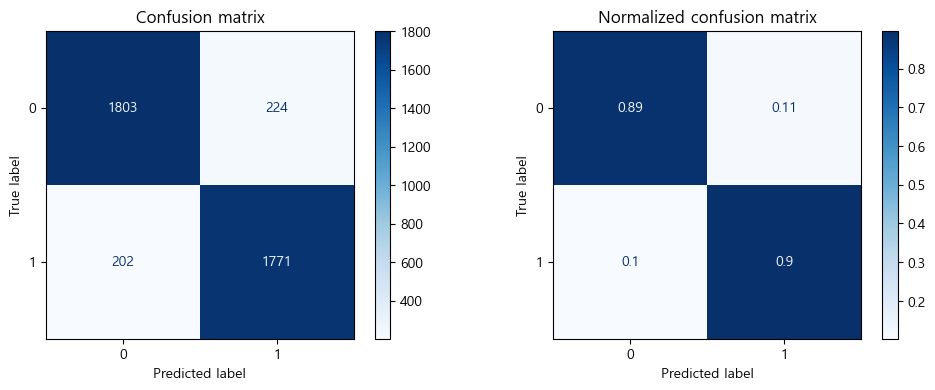

In [205]:
get_evaluation(y_test, prediction, lgbm, X_test)

### 📌 3-4. Cycle  
<strong>굉장히 높은 성능이 나왔다.</strong>
RFC와 비교를 해보면,  
정확도: 0.7362, 정밀도: 0.7311, 재현율: 0.7359, F1 점수: 0.7335, ROC-AUC: 0.7362 이었고,  
<strong>LightGBM은</strong>  
정확도: 0.8935, 정밀도: 0.8877, 재현율: 0.8976, F1: 0.8926, ROC-AUC: 0.8936로 전체적으로 <strong>0.15씩 증가</strong>한 것을 알 수 있다.  

### 4. 전체 비교

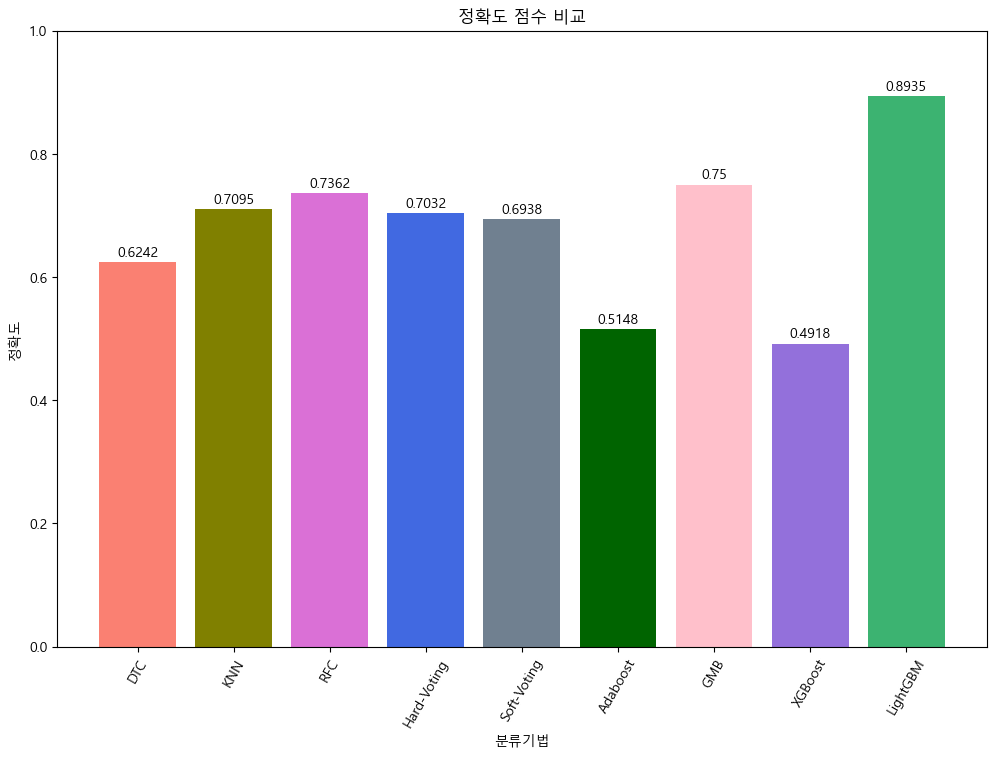

In [206]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12, 8))
colors = ['salmon', 'olive', 'orchid', 'royalblue', 'slategrey', 'darkgreen', 'pink', 'mediumpurple', 'mediumseagreen']
accuracies = [dtc_ac,
              knn_ac,
              rfc_ac,
              hv_ac,
              sv_ac,
              ada_ac,
              gbc_ac,
              xgb_ac,
              lgbm_ac
             ]
classifiers = ['DTC', 'KNN', 'RFC', 'Hard-Voting', 'Soft-Voting', 'Adaboost', 'GMB', 'XGBoost', 'LightGBM']
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('분류기법')
plt.ylabel('정확도')
plt.title('정확도 점수 비교')
plt.ylim(0, 1)
plt.xticks(rotation=60)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

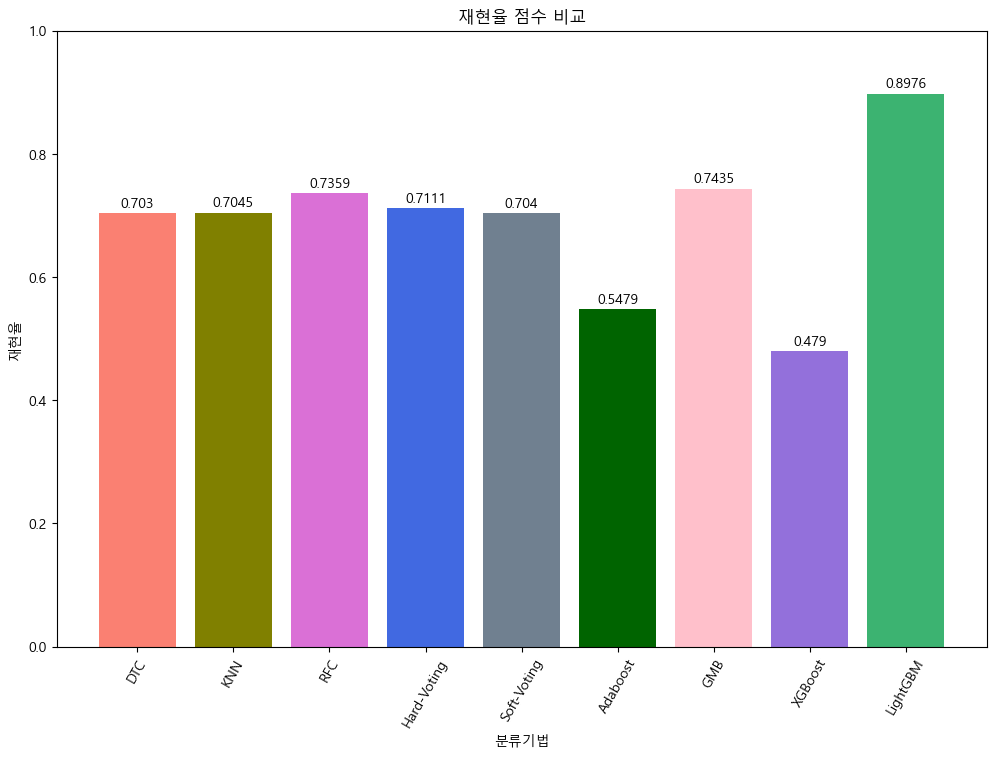

In [211]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12, 8))
colors = ['salmon', 'olive', 'orchid', 'royalblue', 'slategrey', 'darkgreen', 'pink', 'mediumpurple', 'mediumseagreen']
recalls = [dtc_rc,
              knn_rc,
              rfc_rc,
              hv_rc,
              sv_rc,
              ada_rc,
              gbc_rc,
              xgb_rc,
              lgbm_rc
             ]
classifiers = ['DTC', 'KNN', 'RFC', 'Hard-Voting', 'Soft-Voting', 'Adaboost', 'GMB', 'XGBoost', 'LightGBM']
plt.bar(classifiers, recalls, color=colors)
plt.xlabel('분류기법')
plt.ylabel('재현율')
plt.title('재현율 점수 비교')
plt.ylim(0, 1)
plt.xticks(rotation=60)

for i, v in enumerate(recalls):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

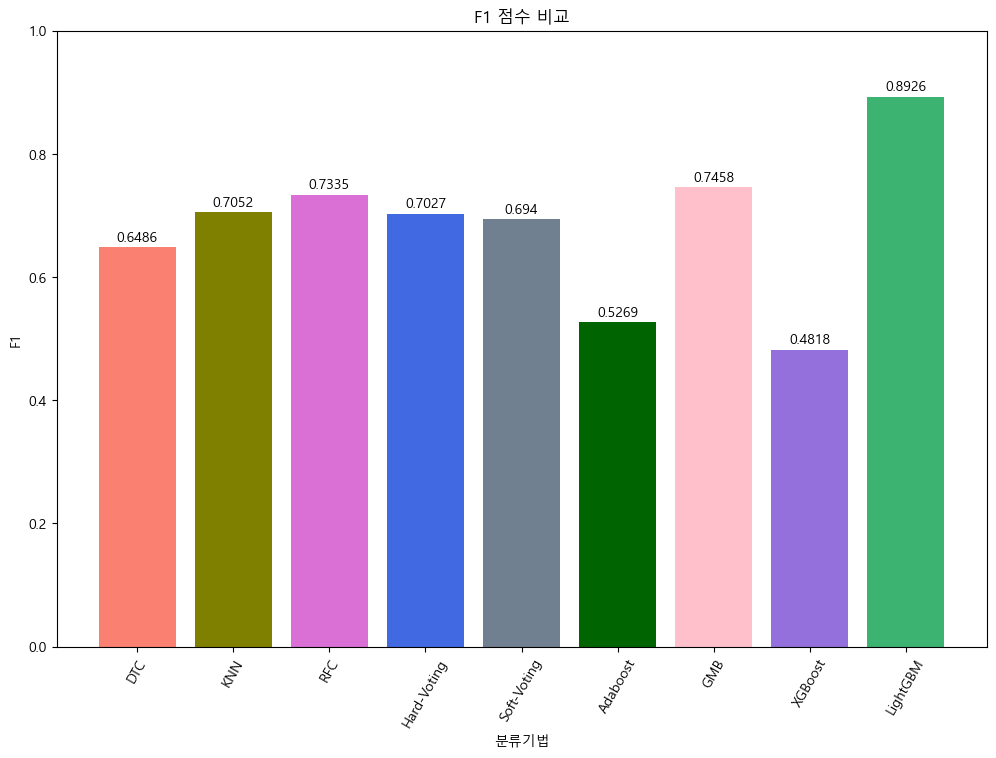

In [213]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12, 8))
colors = ['salmon', 'olive', 'orchid', 'royalblue', 'slategrey', 'darkgreen', 'pink', 'mediumpurple', 'mediumseagreen']
f1s = [dtc_f1,
       knn_f1,
       rfc_f1,
       hv_f1,
       sv_f1,
       ada_f1,
       gbc_f1,
       xgb_f1,
       lgbm_f1
      ]
classifiers = ['DTC', 'KNN', 'RFC', 'Hard-Voting', 'Soft-Voting', 'Adaboost', 'GMB', 'XGBoost', 'LightGBM']
plt.bar(classifiers, f1s, color=colors)
plt.xlabel('분류기법')
plt.ylabel('F1')
plt.title('F1 점수 비교')
plt.ylim(0, 1)
plt.xticks(rotation=60)

for i, v in enumerate(f1s):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

### 📋Totalc Cycle 결론  
- 1. 정확도
> LighGMB이 0.8935로 가장 높은 정확도를 가지고 있다.

- 2. 재현율
> 이 역시 LighGMB이 가장 높은 수치를 가지고 있다.

- 3. F1
> F1 점수가 가장 높은 분류기법은 LightGBM이 0.8962로 가장 높은 수치를 가지고 있다.  

따라서, <strong>LightGMB 분류기법은</strong> 세 지표에서 일관되게 가장 높은 값을 보여주므로 <strong>다른 분류기들 보다</strong> 전반적으로 <strong>더 높은 성능</strong>을 보이기 때문에 해당 데이터 세트에선 <strong>LightGMB이 가장 적합해</strong> 보인다.